##### Dataset

In [2]:
# https://mitu.co.in/dataset
# File -> Social_Network_Ads.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read data
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [6]:
# Separate the input and output variables
x = df[['Age','EstimatedSalary']]  # input
y = df['Purchased']   # output

In [7]:
x.shape

(400, 2)

In [18]:
# Cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [19]:
x_train.shape

(300, 2)

In [20]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

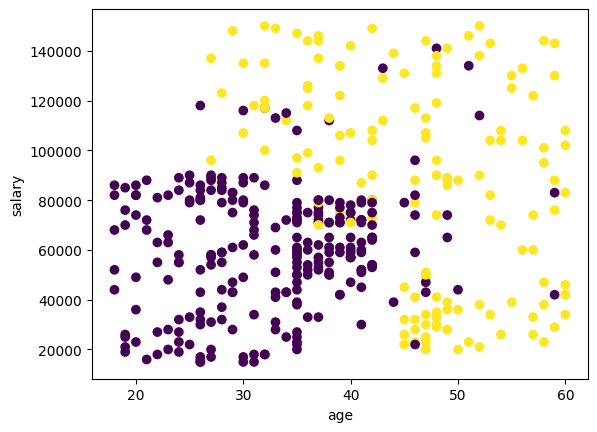

In [21]:
plt.xlabel('age'); plt.ylabel('salary')
plt.scatter(x['Age'], x['EstimatedSalary'],c=y)

In [22]:
# import the class
from sklearn.tree import DecisionTreeClassifier
# create the object
dt = DecisionTreeClassifier(random_state=0)
# train the algorithm
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
x_test

,Age,EstimatedSalary
132,30.0,87000.0
309,38.0,50000.0
341,35.0,75000.0
196,30.0,79000.0
246,35.0,50000.0
...,...,...
146,27.0,96000.0
135,23.0,63000.0
390,48.0,33000.0
264,48.0,90000.0


In [25]:
# prediction on test data
y_pred = dt.predict(x_test)

In [27]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [32]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[62,  6],
       [ 4, 28]])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

90.0

In [36]:
new = pd.DataFrame({
  'Age': [56,24,38],
  'EstimatedSalary': [45000, 67000,134000]  
})

In [37]:
new

,Age,EstimatedSalary
0,56,45000
1,24,67000
2,38,134000


In [38]:
dt.predict(new)

array([0, 0, 1])